Images are pre-processed by function I wrote at the Lab1, which will help the images get the larger contrast between the target and background.

In [2]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from numpy import ndarray
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import os
from PIL import Image



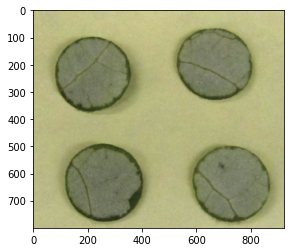

In [3]:
img1 = imread("/content/drive/MyDrive/images/Lab2-image/1.png")
plt.imshow(img1)

I hope to use the color difference to divide the leaves and background.
Firstly, we should read the picture.

Then we should change the RGB picture to the HSV picture. According to the showed picture, we found that only the edge of the leaves is recognized, the leaves' center show the same(similar) color as the background.
So, we can not use the HSV to find the leaf. After deeply researching the HSV, we found: because the background is yellow, in the HSV array, green's value of S and V is almost same as yellow, there is a little different in value H.  So, we could not use it to found the leaf.

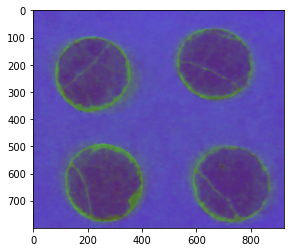

In [4]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

I found that we could use the Y Cr Cb as the characteristic to recognize the leaf. Because I found that the Y and Cb 's value of green has the obvious different with yellow. Even we considered the compatible with the difference between white and green, which is little different in value Y, we need to extend the limit of Y, we also could get the result.

49008
176928
530784
0.27699403147042867


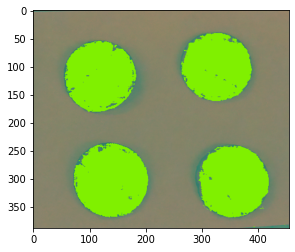

In [20]:
def method3(path):
  img = cv2.imread(path)
  YCRCB = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

  (y,cr,cb)= cv2.split(YCRCB)


  # find (YCRCB.shape)
  xlimt = YCRCB.shape[0]
  ylimt = YCRCB.shape[1]
  z = 0
  for x in range(0,xlimt):
    for y in range(0,ylimt):
      pixel = YCRCB[x][y]
      if pixel[0] in range(30,158):
        if pixel[1] in range(110,130):
          if pixel[2] in range(111,130):
            z = z + 1
            YCRCB[x][y] = [128,240,0]
  print(z)
  plt.imshow(YCRCB)
  size = xlimt*ylimt
  print(size)
  print(z/size)

method3("/content/drive/MyDrive/images/Lab2-image/origin/1.png")

277652
556512
1669536
0.49891466850669886


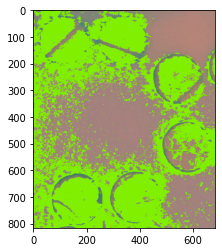

In [21]:
method3("/content/drive/MyDrive/images/Lab2-image/origin/2.png")

126492
716680
2150040
0.176497181447787


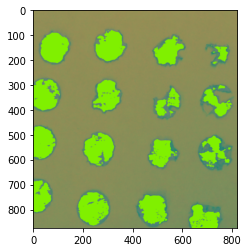

In [22]:
method3("/content/drive/MyDrive/images/Lab2-image/3.png")